In [5]:
import imageio
import sys
import numpy as np
import json
import os
import gzip
from skimage.measure import block_reduce
from skimage.transform import resize

In [6]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def display(img, title=''):
    plt.figure()
    plt.title(f'{title} {img.shape}')
    plt.axis('off')
    
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)

In [8]:
def batch_downsample(batch):
    batch_size = len(batch)
    crop = batch[:, 9:-9, 16:-16]
    blocky = block_reduce(crop, (1,3,2,1), np.max)
    
    # Select top five rows of each frame
    partial = blocky[:, :5, :, :]
    
    # Count the number of non-zero red (in RGB) elements in top section of each frame
    nonzero = np.count_nonzero(partial[:, :, :, 0], axis=(1,2))
    scoreboard = nonzero > 48
    commander  = (~scoreboard) & (nonzero > 0)

    # if commander does not exist, do not process further
    if np.count_nonzero(commander) == 0:
        return None
    
    # smoother resizing method
    blurry = resize(crop, (batch_size, 64, 64, 3), mode='constant')
    
    # remove scoreboard
    blurry[scoreboard, :5] = 0
    
    # whiten bullets
    blurry[blocky[:,:,:,0] == 142] = 1.0
    
    # whiten commandership
    blurry[commander, :5] = np.where(blocky[commander, :5] > 0, 1.0, 0.0)
    
    return blurry

In [19]:
samples = np.load('data/raw_food/1000626761.npz')

In [20]:
b1 = batch_downsample(samples['obs'])
if b1 is None:
    print('None')

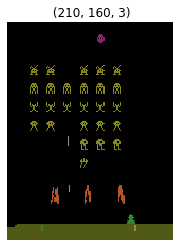

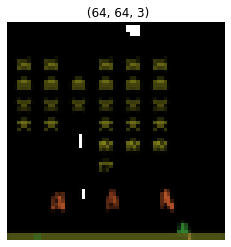

In [21]:
idx = 720
display(samples['obs'][idx])
display(b1[idx])

In [22]:
samples = np.load('data/raw_food/1750857.npz')
b1 = batch_downsample(samples['obs'])
if b1 is None:
    print('None')

None


In [2]:
# idx = 30
# display(samples['obs'][idx])
# display(b1[idx])

In [18]:
def remove_files(root, dest):
    for filename in os.listdir(root):
        if not filename.endswith('.npz'):
            continue
        
        os.remove(dest + filename)

In [19]:
remove_files('data/vae_food_new/', 'data/vae_food_3/')

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'data/vae_food_3/1000626761.npz'

In [13]:
def commander_files_only(root, dest):
    for filename in os.listdir(root):
        if not filename.endswith('.npz'):
            continue
        
        samples = np.load(root + filename)
        obs = samples['obs']
        
        if len(obs) < 600:
            continue
            
        downsampled = batch_downsample(obs)
        if downsampled is not None:
            np.savez_compressed(dest + filename, 
                                obs=downsampled, 
                                action=samples['action'], 
                                reward=samples['reward'], 
                                done=samples['done'])
            print(f'Saved {filename}')

In [14]:
commander_files_only('data/raw_food/', 'data/vae_food_new/')

Saved 1000626761.npz
Saved 1001053853.npz
Saved 1001829789.npz
Saved 1001980164.npz
Saved 1002231553.npz
Saved 1002596297.npz
Saved 1002667418.npz
Saved 1005183729.npz
Saved 1006547279.npz
Saved 1006710316.npz
Saved 1007628743.npz
Saved 1007886505.npz
Saved 1008200306.npz
Saved 1008919310.npz
Saved 1009051873.npz
Saved 1009882064.npz
Saved 1010365639.npz
Saved 1010397289.npz
Saved 1011802584.npz
Saved 1012191294.npz
Saved 1012587433.npz
Saved 1012635507.npz
Saved 1013925798.npz
Saved 1014522773.npz
Saved 101454473.npz
Saved 1015153375.npz
Saved 1015284319.npz
Saved 1015366187.npz
Saved 1015766395.npz
Saved 1015917888.npz
Saved 1016148897.npz
Saved 1016441253.npz
Saved 1016522838.npz
Saved 1016723324.npz
Saved 1016874839.npz
Saved 1017372358.npz
Saved 1018099367.npz
Saved 1018138430.npz
Saved 1018620545.npz
Saved 1018721107.npz
Saved 1019511269.npz
Saved 1021232929.npz
Saved 1021498320.npz
Saved 1021621810.npz
Saved 1021827662.npz
Saved 1022240336.npz
Saved 1022378764.npz
Saved 10225271

Saved 1169700051.npz
Saved 1170204216.npz
Saved 1170422278.npz
Saved 1170797147.npz
Saved 1172111608.npz
Saved 1173427409.npz
Saved 1173702768.npz
Saved 1175317761.npz
Saved 1175698158.npz
Saved 1175744865.npz
Saved 1176050147.npz
Saved 1177731283.npz
Saved 1177800502.npz
Saved 1177941770.npz
Saved 1178362662.npz
Saved 1178541383.npz
Saved 1178972859.npz
Saved 1179087743.npz
Saved 1179382031.npz
Saved 11797529.npz
Saved 1180553416.npz
Saved 1180877524.npz
Saved 1180969292.npz
Saved 1181181331.npz
Saved 1181876366.npz
Saved 1182653282.npz
Saved 1182663937.npz
Saved 1182952433.npz
Saved 1183203327.npz
Saved 1183304469.npz
Saved 118427730.npz
Saved 1184727570.npz
Saved 1184737869.npz
Saved 1185301828.npz
Saved 1186473505.npz
Saved 1186873019.npz
Saved 1187043774.npz
Saved 1187393411.npz
Saved 11875292.npz
Saved 1187976380.npz
Saved 1188205777.npz
Saved 1188727167.npz
Saved 1188798775.npz
Saved 1189139957.npz
Saved 1189569091.npz
Saved 1190023329.npz
Saved 1190147496.npz
Saved 1190357415.n

Saved 1348816006.npz
Saved 1349131263.npz
Saved 1350050150.npz
Saved 1350250430.npz
Saved 1351061855.npz
Saved 1351619752.npz
Saved 1351971019.npz
Saved 1352713447.npz
Saved 1352737056.npz
Saved 1352775372.npz
Saved 1354046274.npz
Saved 1355125769.npz
Saved 135520383.npz
Saved 135543714.npz
Saved 1355689046.npz
Saved 1356577109.npz
Saved 1357391.npz
Saved 1357484168.npz
Saved 1359044826.npz
Saved 1360256127.npz
Saved 1360371656.npz
Saved 1360765171.npz
Saved 1361416235.npz
Saved 1362095970.npz
Saved 1362552849.npz
Saved 1363150000.npz
Saved 1363445782.npz
Saved 1364473940.npz
Saved 1364491902.npz
Saved 1364993453.npz
Saved 1365148446.npz
Saved 1367215669.npz
Saved 1367813814.npz
Saved 136795821.npz
Saved 1369292342.npz
Saved 1370160178.npz
Saved 1370294911.npz
Saved 1370335413.npz
Saved 1371167719.npz
Saved 1371850224.npz
Saved 1372085420.npz
Saved 1372900111.npz
Saved 1373211559.npz
Saved 1374203039.npz
Saved 1374977518.npz
Saved 1375257150.npz
Saved 1375741625.npz
Saved 1376249157.np

Saved 1531102001.npz
Saved 1531497551.npz
Saved 1531557830.npz
Saved 1532129369.npz
Saved 1532137539.npz
Saved 1532583422.npz
Saved 1532611118.npz
Saved 1533648474.npz
Saved 1534324526.npz
Saved 1534792568.npz
Saved 1534862311.npz
Saved 1535183330.npz
Saved 1535189122.npz
Saved 1536357318.npz
Saved 1536361359.npz
Saved 153732504.npz
Saved 1537499572.npz
Saved 1537823781.npz
Saved 1538430232.npz
Saved 1538590933.npz
Saved 1538710200.npz
Saved 1539421921.npz
Saved 1540573145.npz
Saved 1541645823.npz
Saved 154229635.npz
Saved 1542539851.npz
Saved 154324388.npz
Saved 1543569353.npz
Saved 1543635180.npz
Saved 1543867188.npz
Saved 154387416.npz
Saved 1544352977.npz
Saved 1544810385.npz
Saved 154506248.npz
Saved 1546371329.npz
Saved 1546525877.npz
Saved 1546544229.npz
Saved 1547439665.npz
Saved 1547582739.npz
Saved 1548371160.npz
Saved 1548760249.npz
Saved 154897095.npz
Saved 1549274746.npz
Saved 1549640710.npz
Saved 1549689482.npz
Saved 155069013.npz
Saved 1551058625.npz
Saved 1551154367.npz

Saved 1705207482.npz
Saved 1705256887.npz
Saved 1705557758.npz
Saved 1705710252.npz
Saved 1705809499.npz
Saved 1706303342.npz
Saved 1706825801.npz
Saved 1708046202.npz
Saved 1708082540.npz
Saved 1708548696.npz
Saved 1708585026.npz
Saved 1710648847.npz
Saved 171126175.npz
Saved 1711737189.npz
Saved 1711803599.npz
Saved 171207574.npz
Saved 1713503843.npz
Saved 1713588726.npz
Saved 1713829236.npz
Saved 1714511076.npz
Saved 1715017848.npz
Saved 1715081251.npz
Saved 1716845311.npz
Saved 1717281977.npz
Saved 17177980.npz
Saved 1717908372.npz
Saved 1718214680.npz
Saved 1719094632.npz
Saved 1719095482.npz
Saved 1719136164.npz
Saved 17194009.npz
Saved 1719510456.npz
Saved 1719786085.npz
Saved 1719791948.npz
Saved 1722678514.npz
Saved 1722700281.npz
Saved 1723106980.npz
Saved 1723297239.npz
Saved 1723520554.npz
Saved 1723795038.npz
Saved 1723994153.npz
Saved 172401455.npz
Saved 1724801177.npz
Saved 1724932494.npz
Saved 1725335640.npz
Saved 1725744696.npz
Saved 1727311597.npz
Saved 1727456481.npz

Saved 1896046252.npz
Saved 1896555678.npz
Saved 1896664244.npz
Saved 1898545615.npz
Saved 1900343955.npz
Saved 1900455304.npz
Saved 1900501417.npz
Saved 1900528902.npz
Saved 190109717.npz
Saved 1901232506.npz
Saved 1901248086.npz
Saved 1901282917.npz
Saved 1901626027.npz
Saved 1901774403.npz
Saved 190217427.npz
Saved 190300788.npz
Saved 190404640.npz
Saved 190454523.npz
Saved 1905075729.npz
Saved 1905823547.npz
Saved 1905923737.npz
Saved 1906351127.npz
Saved 1907078254.npz
Saved 1907148634.npz
Saved 1907313078.npz
Saved 1908062796.npz
Saved 1908463919.npz
Saved 1908693217.npz
Saved 1910242713.npz
Saved 1910347123.npz
Saved 1910467608.npz
Saved 191142014.npz
Saved 1911436269.npz
Saved 191198945.npz
Saved 1912755163.npz
Saved 1913587163.npz
Saved 1914524839.npz
Saved 1914531281.npz
Saved 191469526.npz
Saved 1914750986.npz
Saved 1914755072.npz
Saved 1915121702.npz
Saved 1915533162.npz
Saved 1916107280.npz
Saved 1916117247.npz
Saved 1916434621.npz
Saved 1916457885.npz
Saved 1916557294.npz


Saved 2068642232.npz
Saved 2068839520.npz
Saved 2068847476.npz
Saved 2068968060.npz
Saved 2069557070.npz
Saved 206962659.npz
Saved 2069672329.npz
Saved 2069760387.npz
Saved 206999740.npz
Saved 2070127369.npz
Saved 2070414548.npz
Saved 2070568930.npz
Saved 2070949545.npz
Saved 207200291.npz
Saved 2072205965.npz
Saved 2072897697.npz
Saved 2073748086.npz
Saved 2073934626.npz
Saved 2074090307.npz
Saved 2074218650.npz
Saved 2074289346.npz
Saved 2074432020.npz
Saved 207459160.npz
Saved 2074960514.npz
Saved 2075887531.npz
Saved 2076622715.npz
Saved 207742482.npz
Saved 2078312218.npz
Saved 2078378851.npz
Saved 2078527281.npz
Saved 2078682655.npz
Saved 2078698694.npz
Saved 2078848130.npz
Saved 2079070292.npz
Saved 2079445204.npz
Saved 207963708.npz
Saved 2080192912.npz
Saved 2081588133.npz
Saved 2082031491.npz
Saved 2082355090.npz
Saved 2083688211.npz
Saved 2083862919.npz
Saved 2086739110.npz
Saved 2087133880.npz
Saved 2087750840.npz
Saved 2087775866.npz
Saved 2090061538.npz
Saved 2090547998.np

Saved 323094114.npz
Saved 323261288.npz
Saved 324131004.npz
Saved 324823238.npz
Saved 325131243.npz
Saved 325198479.npz
Saved 325594686.npz
Saved 326116898.npz
Saved 326334878.npz
Saved 326512776.npz
Saved 326771311.npz
Saved 327035193.npz
Saved 32711405.npz
Saved 327135308.npz
Saved 327171771.npz
Saved 327239250.npz
Saved 327818760.npz
Saved 327855968.npz
Saved 32946919.npz
Saved 330069563.npz
Saved 330127908.npz
Saved 330202974.npz
Saved 330684503.npz
Saved 331263106.npz
Saved 332093695.npz
Saved 332907798.npz
Saved 333117308.npz
Saved 333366524.npz
Saved 334013925.npz
Saved 335973796.npz
Saved 336247575.npz
Saved 336594651.npz
Saved 336634461.npz
Saved 337126816.npz
Saved 337336249.npz
Saved 337366260.npz
Saved 337710074.npz
Saved 337745941.npz
Saved 337832304.npz
Saved 33868678.npz
Saved 338698960.npz
Saved 339237931.npz
Saved 339602019.npz
Saved 341379003.npz
Saved 341691061.npz
Saved 341716279.npz
Saved 34191080.npz
Saved 343129469.npz
Saved 343602531.npz
Saved 344286479.npz
Save

Saved 507912298.npz
Saved 50809358.npz
Saved 50905848.npz
Saved 509516869.npz
Saved 510847876.npz
Saved 511326121.npz
Saved 512280320.npz
Saved 512456874.npz
Saved 512954180.npz
Saved 513595568.npz
Saved 515152093.npz
Saved 515242750.npz
Saved 515738367.npz
Saved 515985797.npz
Saved 516798763.npz
Saved 517149840.npz
Saved 517996009.npz
Saved 518626244.npz
Saved 519551822.npz
Saved 520155453.npz
Saved 520289526.npz
Saved 520688881.npz
Saved 522031791.npz
Saved 522324885.npz
Saved 522532334.npz
Saved 52307368.npz
Saved 523272768.npz
Saved 523479027.npz
Saved 524310050.npz
Saved 5244223.npz
Saved 525612010.npz
Saved 526544655.npz
Saved 527506445.npz
Saved 527511017.npz
Saved 528097938.npz
Saved 528133016.npz
Saved 528701752.npz
Saved 529278407.npz
Saved 529494115.npz
Saved 529661051.npz
Saved 530519499.npz
Saved 530796778.npz
Saved 531183429.npz
Saved 531921329.npz
Saved 532234906.npz
Saved 53337110.npz
Saved 534599846.npz
Saved 534797968.npz
Saved 534925233.npz
Saved 536242048.npz
Saved 

Saved 681271045.npz
Saved 681285957.npz
Saved 681744727.npz
Saved 682015113.npz
Saved 682101610.npz
Saved 682344574.npz
Saved 682379697.npz
Saved 682589502.npz
Saved 68260635.npz
Saved 682953328.npz
Saved 683127384.npz
Saved 683152184.npz
Saved 683179616.npz
Saved 683183771.npz
Saved 683387530.npz
Saved 683651606.npz
Saved 68388121.npz
Saved 684340119.npz
Saved 684612689.npz
Saved 684632509.npz
Saved 684688221.npz
Saved 684918076.npz
Saved 685605132.npz
Saved 686585325.npz
Saved 687045496.npz
Saved 68843417.npz
Saved 688476781.npz
Saved 68850108.npz
Saved 688851610.npz
Saved 691333962.npz
Saved 691455970.npz
Saved 691906646.npz
Saved 691977609.npz
Saved 691985213.npz
Saved 692336030.npz
Saved 694175891.npz
Saved 694774046.npz
Saved 69479752.npz
Saved 694962254.npz
Saved 695483821.npz
Saved 695630053.npz
Saved 695854397.npz
Saved 696920818.npz
Saved 697151258.npz
Saved 69732965.npz
Saved 697392579.npz
Saved 697479132.npz
Saved 697553445.npz
Saved 698864283.npz
Saved 699671050.npz
Saved 

Saved 855345953.npz
Saved 855912543.npz
Saved 856655892.npz
Saved 857117445.npz
Saved 857951715.npz
Saved 859546073.npz
Saved 859984740.npz
Saved 860050407.npz
Saved 860212375.npz
Saved 86123634.npz
Saved 86196417.npz
Saved 862063931.npz
Saved 862377379.npz
Saved 862777788.npz
Saved 863562592.npz
Saved 86385547.npz
Saved 864068393.npz
Saved 864605289.npz
Saved 864737165.npz
Saved 86542284.npz
Saved 86549727.npz
Saved 866193982.npz
Saved 866437236.npz
Saved 867910618.npz
Saved 868576071.npz
Saved 868663071.npz
Saved 869105841.npz
Saved 869634624.npz
Saved 870696627.npz
Saved 872081763.npz
Saved 872868955.npz
Saved 87299337.npz
Saved 873264681.npz
Saved 873629485.npz
Saved 873952383.npz
Saved 874608935.npz
Saved 876234954.npz
Saved 876300242.npz
Saved 876994110.npz
Saved 877655739.npz
Saved 878214487.npz
Saved 87841857.npz
Saved 878443635.npz
Saved 878474964.npz
Saved 878566945.npz
Saved 879155737.npz
Saved 879401199.npz
Saved 879507087.npz
Saved 880022784.npz
Saved 880164062.npz
Saved 8